Data Loading, Storage and File Formats 
Problem Statement: Analyzing Sales Data from Multiple File Formats 
Dataset: Sales data in multiple file formats (e.g., CSV, Excel, JSON) 
Description: The goal is to load and analyze sales data from different file formats, including 
CSV, Excel, and JSON, and perform data cleaning, transformation, and analysis on the 
dataset. 

1. Load the sales data from each file format into the appropriate data structures or 
dataframes. 
2. Explore the structure and content of the loaded data, identifying any inconsistencies, 
missing values, or data quality issues. 
3. Perform data cleaning operations, such as handling missing values, removing 
duplicates, or correcting inconsistencies. 
4. Convert the data into a unified format, such as a common dataframe or data structure, 
to enable seamless analysis.
5. Perform data transformation tasks, such as merging multiple datasets, splitting 
columns, or deriving new variables. 
6. Analyze the sales data by performing descriptive statistics, aggregating data by 
specific variables, or calculating metrics such as total sales, average order value, or 
product category distribution. 
7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales 
data and gain insights into sales trends, customer behavior, or product performance.

In [7]:
# Import necessary libraries
import pandas as pd,re,json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Load the sales data from each file format into the appropriate data structures or dataframes.

In [8]:
# Load the sales data from CSV
df = pd.read_csv('sales_data_sample.csv',encoding='Latin1')
djson = pd.read_json('sales_data_sample.json')
dxlsx = pd.read_excel('sales_data_sample.xlsx')
# Display the first few rows to understand the structure
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
djson.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,ADDRESSLINE2
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NYC,NY,10022,USA,NA,Yu,Kwai,Small,NaN
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,NaN
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,NaN
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,Pasadena,CA,90003,USA,NA,Young,Julie,Medium,NaN
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,San Francisco,CA,NaN,USA,NA,Brown,Julie,Medium,NaN


In [10]:
dxlsx.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


# 2. Explore the structure and content of the loaded data, identifying any inconsistencies, missing values, or data quality issues.

In [11]:
# Check the shape and column information
print("Data Shape:", df.shape)
print("Column Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# View summary statistics
df.describe(include='all')


Data Shape: (2823, 25)
Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRES

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Perform data cleaning operations, such as handling missing values, removing duplicates, or correcting inconsistencies.

In [12]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handle missing values without inplace assignment
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        df[column] = df[column].fillna('Unknown')
    else:  # Numerical columns
        df[column] = df[column].fillna(df[column].mean())

# Verify the data after cleaning
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())



Missing Values After Cleaning:
ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64


# 4. Convert the data into a unified format, such as a common dataframe or data structure, to enable seamless analysis.

# 5. Perform data transformation tasks, such as merging multiple datasets, splitting columns, or deriving new variables.

In [46]:
# Convert ORDERDATE to datetime format
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'], errors='coerce')

# Derive new variables - for example, calculate total order amount per line
df['TOTAL_ORDER_AMOUNT'] = df['QUANTITYORDERED'] * df['PRICEEACH']

# Extract year, month, and quarter if needed for further analysis
df['YEAR'] = df['ORDERDATE'].dt.year
df['MONTH'] = df['ORDERDATE'].dt.month
df['DAY'] = df['ORDERDATE'].dt.day

# Display the transformed data
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,TOTAL_ORDER_AMOUNT,YEAR,MONTH,DAY
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,10022,USA,Unknown,Yu,Kwai,Small,2871.00,2003,2,24
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,51100,France,EMEA,Henriot,Paul,Small,2765.90,2003,5,7
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,75508,France,EMEA,Da Cunha,Daniel,Medium,3884.34,2003,7,1
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,90003,USA,Unknown,Young,Julie,Medium,3746.70,2003,8,25
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,Unknown,USA,Unknown,Brown,Julie,Medium,4900.00,2003,10,10


merging

deriving new variables-order duration in years

# 6. Analyze the sales data by performing descriptive statistics, aggregating data by specific variables, or calculating metrics such as total sales, average order value, or product category distribution.

In [36]:
# Total sales
total_sales = df['SALES'].sum()
print(f"Total Sales: ${total_sales:,.2f}")

# Average order value
average_order_value = df['TOTAL_ORDER_AMOUNT'].mean()
print(f"Average Order Value: ${average_order_value:,.2f}")

# Sales distribution by product category
sales_by_productline = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)
print("\nSales by Product Line:")
print(sales_by_productline)

# Aggregated data by year and month
monthly_sales = df.groupby(['YEAR', 'MONTH'])['SALES'].sum().unstack()
monthly_sales.head()


Total Sales: $10,032,628.85
Average Order Value: $2,936.91

Sales by Product Line:
PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64


MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2003,129753.60,140836.19,174504.90,201609.55,192673.11,168082.56,187731.88,197809.30,263973.36,568290.97,1029837.66,261876.46
2004,316577.42,311419.53,205733.73,206148.12,273438.39,286674.22,327144.09,461501.27,320750.91,552924.25,1089048.01,372802.66
2005,339543.42,358186.18,374262.76,261633.29,457861.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 7. Create visualizations, such as bar plots, pie charts, or box plots, to represent the sales data and gain insights into sales trends, customer behavior, or product performance.

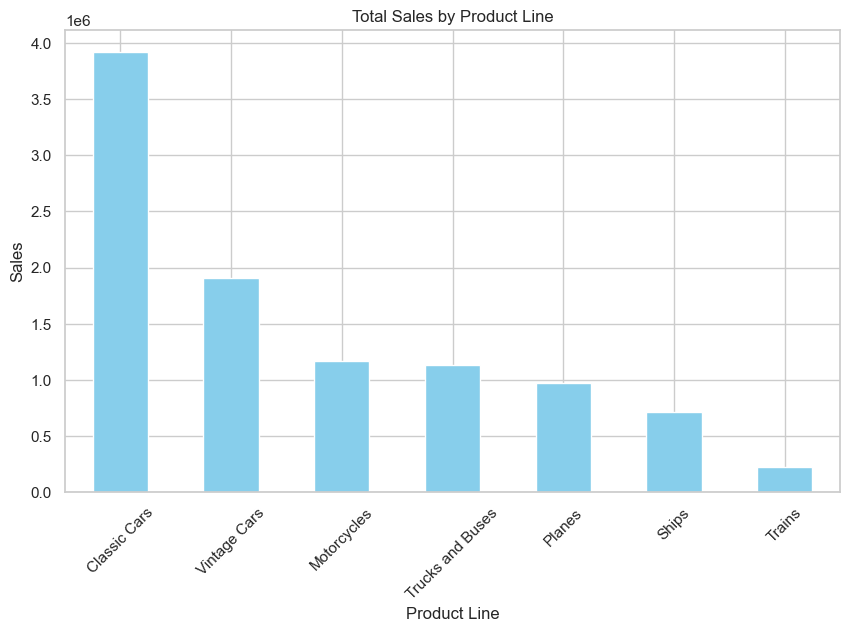

In [47]:
# Bar plot for sales by product line
plt.figure(figsize=(10, 6))
sales_by_productline.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

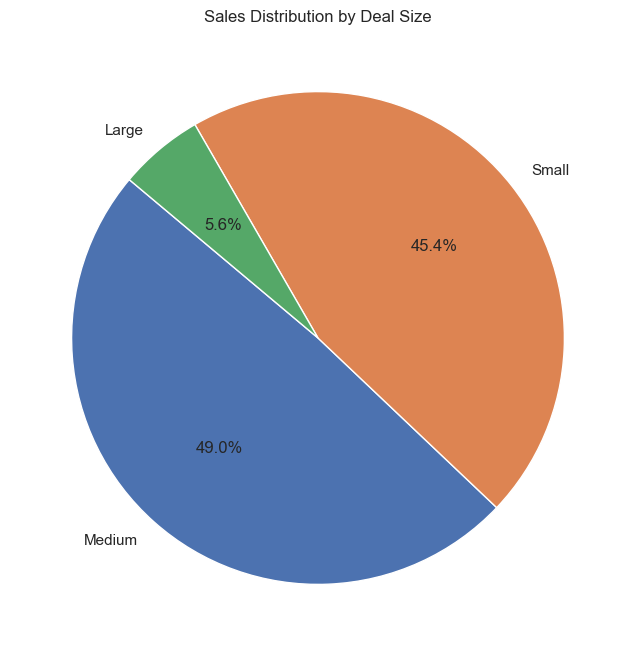

In [38]:
# Pie chart for sales distribution by deal size
plt.figure(figsize=(8, 8))
df['DEALSIZE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Deal Size')
plt.ylabel('')
plt.show()

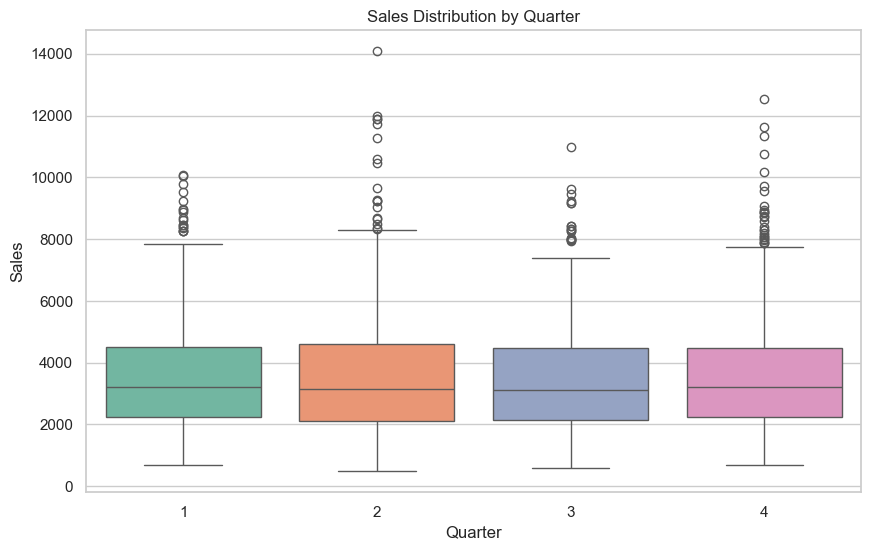

In [39]:
# Box plot for sales distribution by quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='QTR_ID', y='SALES', data=df, hue='QTR_ID', palette="Set2", legend=False)
plt.title('Sales Distribution by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

 QTR_ID represents the quarter of the year in which the sales order was placed. It typically has values ranging from 1 to 4, corresponding to:

1 for Q1 (January to March)
2 for Q2 (April to June)
3 for Q3 (July to September)
4 for Q4 (October to December)

<Figure size 1200x600 with 0 Axes>

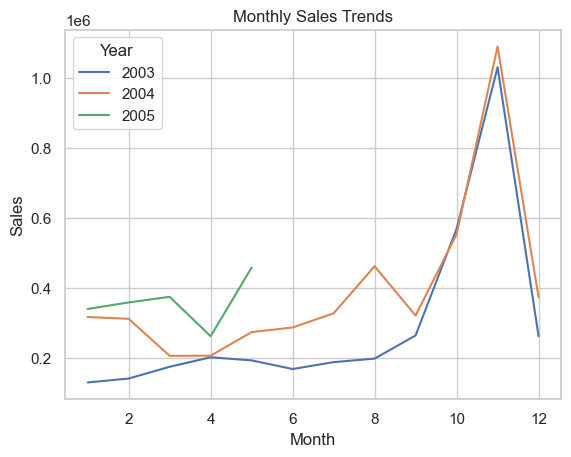

In [40]:
# Line plot for monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.T.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.show()

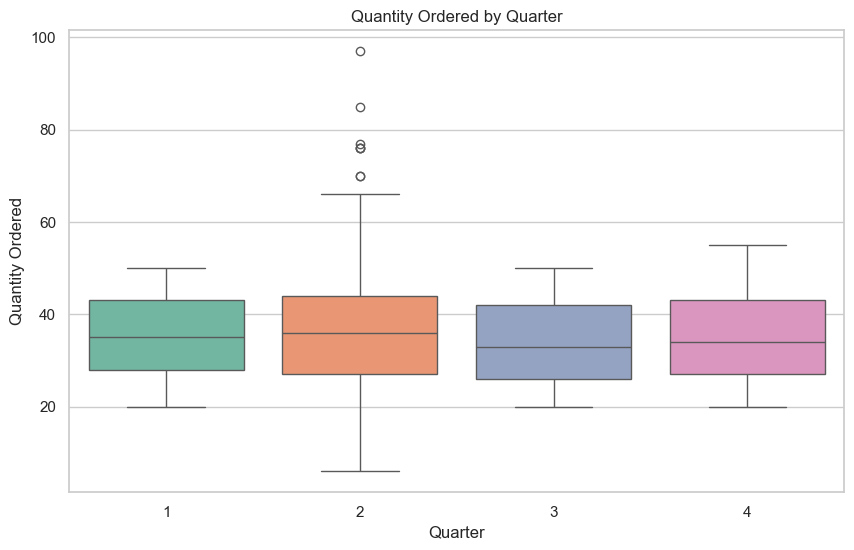

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='QTR_ID', y='QUANTITYORDERED', data=df,hue='QTR_ID', palette="Set2", legend=False)
plt.title('Quantity Ordered by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Quantity Ordered')
plt.show()
